## <font color = green> Machine Learning Intern Assessment Assignment_Customer Churn Prediction

### <font color = blue>  Import the necessary Libraries & Load the dataset into python environment : 

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Scale the features:
from sklearn.preprocessing import MinMaxScaler

# Classification algorithms:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Selection
from sklearn.model_selection import GridSearchCV

# Remove warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'C:\Users\sajee\Downloads\AATHIRA DSA\for job\customer_churn_large_dataset.xlsx') 

### <font color = blue> Perform Data Understanding:

In [3]:
# View first 10 rows of data

data.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [4]:
# Dimension of dataset

data.shape

(100000, 9)

In [5]:
# Information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
# display the columns

data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [7]:
# Summarize the data by generating descriptive statistics of numerical columns

data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
data.describe(include = object).transpose()

,count,unique,top,freq
Name,100000,100000,Customer_1,1
Gender,100000,2,Female,50216
Location,100000,5,Houston,20157


### <font color = blue> Feature Description: 

In [9]:
# Number of numerical columns & Number of categorical columns in the DataFrame

numerical_columns = data.select_dtypes(include=['float', 'int']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 6
Number of Categorical Columns: 3


Numerical Columns

1. CustomerID : column appears to be a unique identifier for each customer.
2. Age : This column represents the age of the customers.
3. Subscription_Length_Months : This column represents the length of the customer's subscription in months. 
4. Monthly_Bill : This column represents the monthly bill amount for each customer.
5. Total_Usage_GB : This column represents the total data usage in gigabytes (GB) for each customer.

Categorical Columns

6. Name : This column contains the names of the customers.
7. Gender : This column indicates the gender of the customers.
8. Location : This column specifies the location or city where the customer is located.

Target Column:

9. Churn : The "Churn" column typically represents whether a customer has discontinued or terminated their subscription or services with the company

* 1: Indicates that the customer has churned, meaning they have discontinued or terminated their subscription or services.
* 0: Indicates that the customer has not churned, meaning they are still active and using the company's services.

## <font color = blue>  Exploratory Data Analysis:

### Unique values: 

In [10]:
# Iterate over the columns

for column in data.columns:
    # Get the unique values for the column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: CustomerID
Unique Values: [     1      2      3 ...  99998  99999 100000]
-----------------------
Column: Name
Unique Values: ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
-----------------------
Column: Age
Unique Values: [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
-----------------------
Column: Gender
Unique Values: ['Male' 'Female']
-----------------------
Column: Location
Unique Values: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
-----------------------
Column: Subscription_Length_Months
Unique Values: [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]
-----------------------
Column: Monthly_Bill
Unique Values: [73.36 48.76 85.47 ... 75.21 41.98 83.55]
-----------------------
Column: Total_Usage_GB
Unique Values: [236 172 460 297 266 456 269 396 150 383 442 295 148 239 23

### Counts of unique values:

In [11]:
# Get counts of unique values in each column
unique_counts = data.nunique()

print("Counts of unique values in each column:")
print(unique_counts)

Counts of unique values in each column:
CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64


### Visualization: 

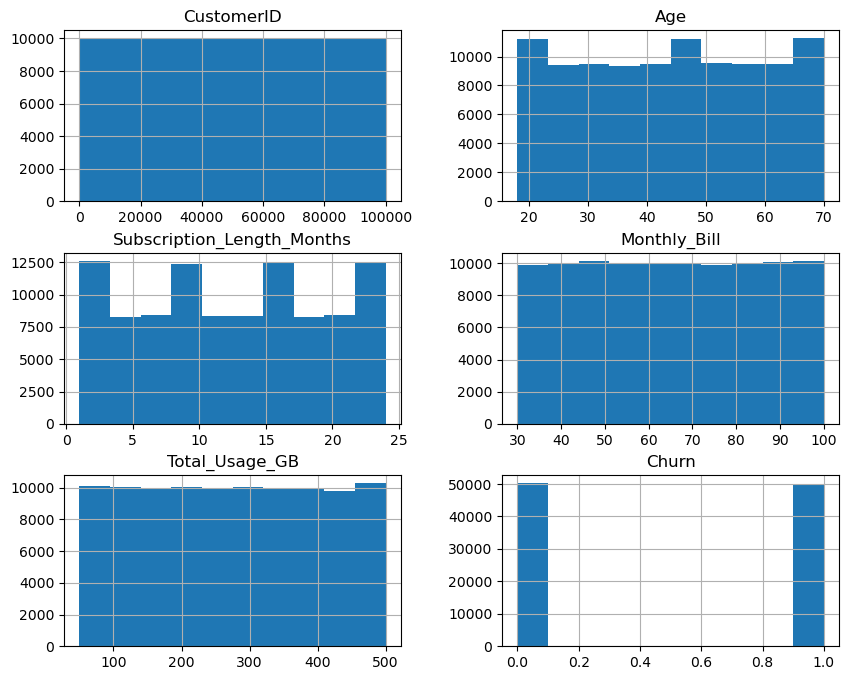

In [12]:
# Frequency Distribution of Numeric Columns:

freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(10,8))
plt.show()

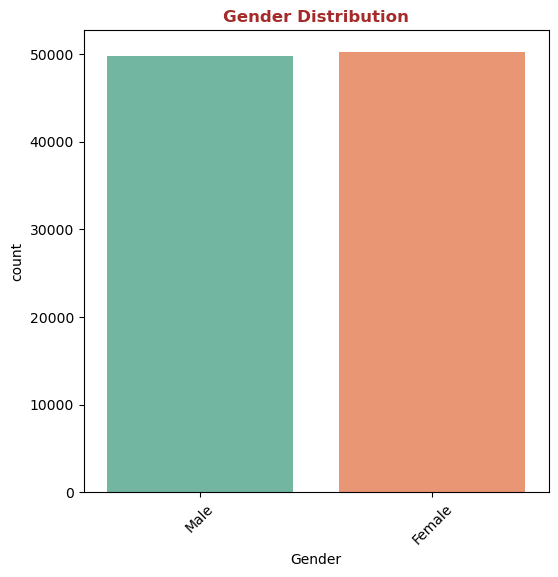

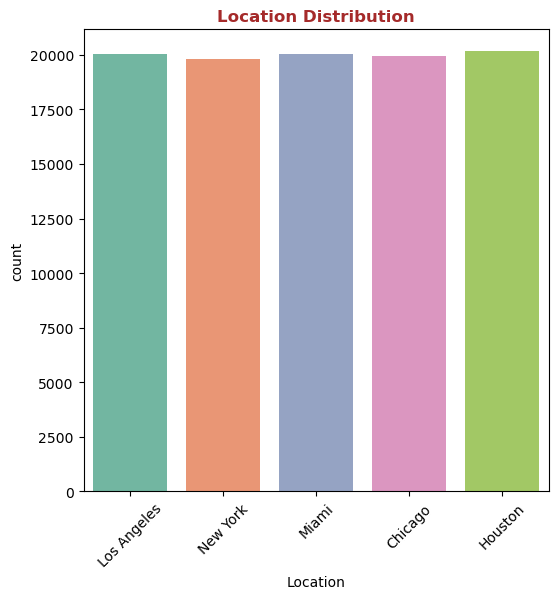

In [13]:
# Plot frequency distribution of categorical columns

# Select categorical columns
categorical_columns = ['Gender', 'Location']

for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=column, data=data, palette='Set2')

    # Add title and labels
    plt.title(f'{column} Distribution', color='brown', fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

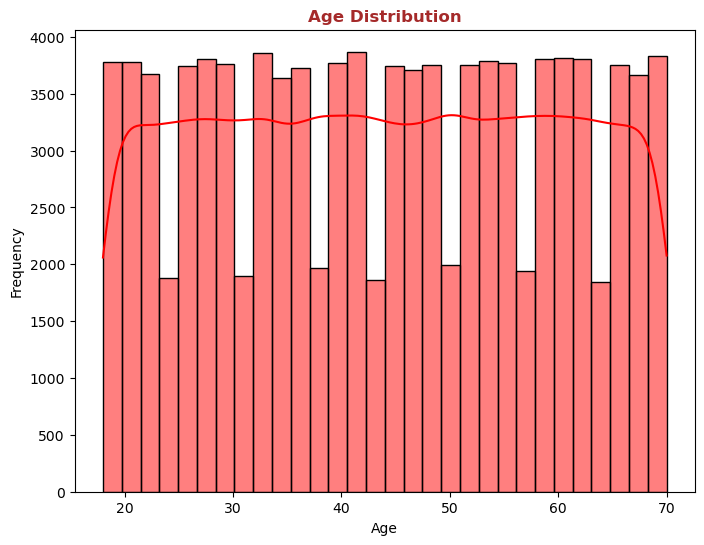

In [14]:
# Plot Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, color='red', kde=True)

# Add title and labels
plt.title('Age Distribution',color='brown', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

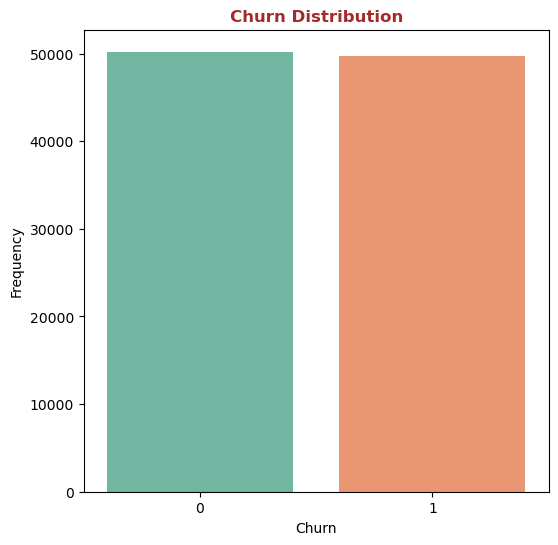

In [15]:
# For 'Churn' column

plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=data, palette='Set2')

# Add title and labels
plt.title('Churn Distribution', color='brown', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

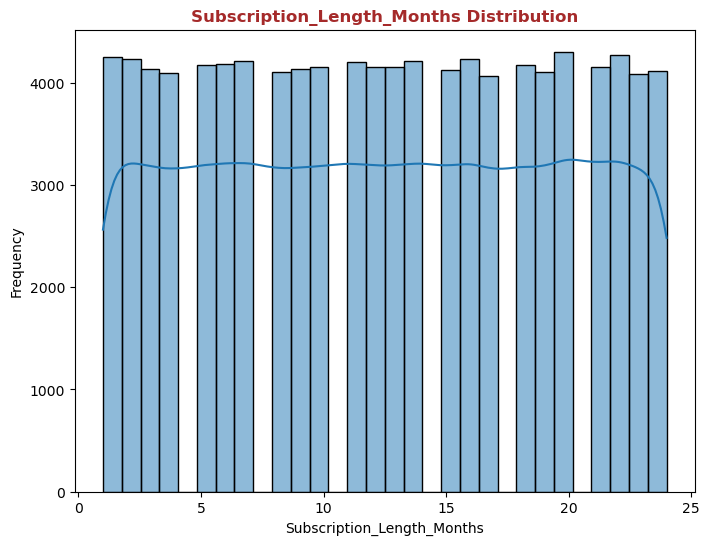

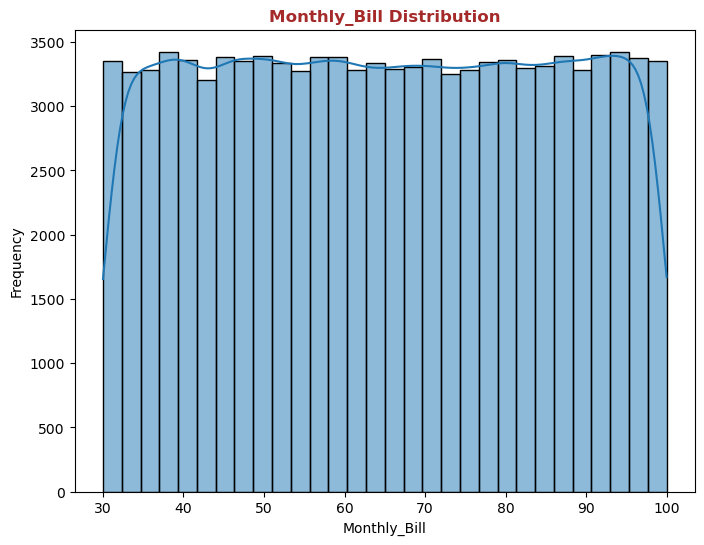

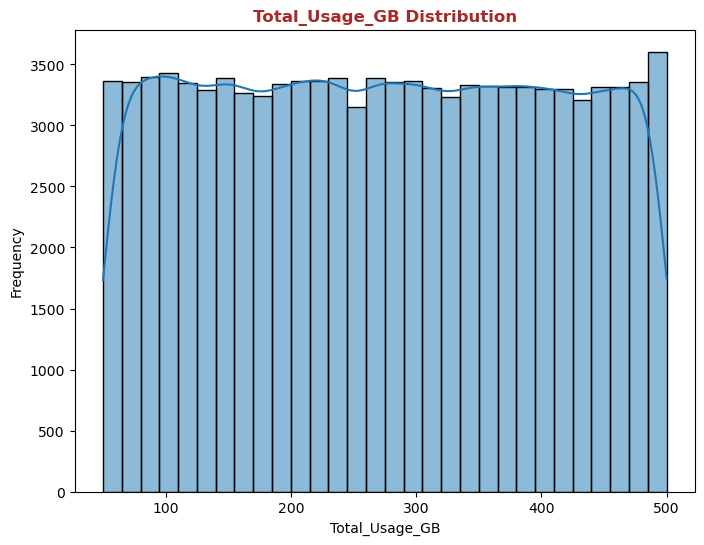

In [16]:
# numeric columns for univariate analysis:

numeric_columns = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, palette='Set2', bins=30)
    
    # Add title and labels
    plt.title(f'{column} Distribution', color='brown', fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
# check skewness of all continuous variables

numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

skewness_values = data[numerical_columns].skew()

# Print skewness values
print(skewness_values)

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
dtype: float64


###### All variables are approximately normally distributed 

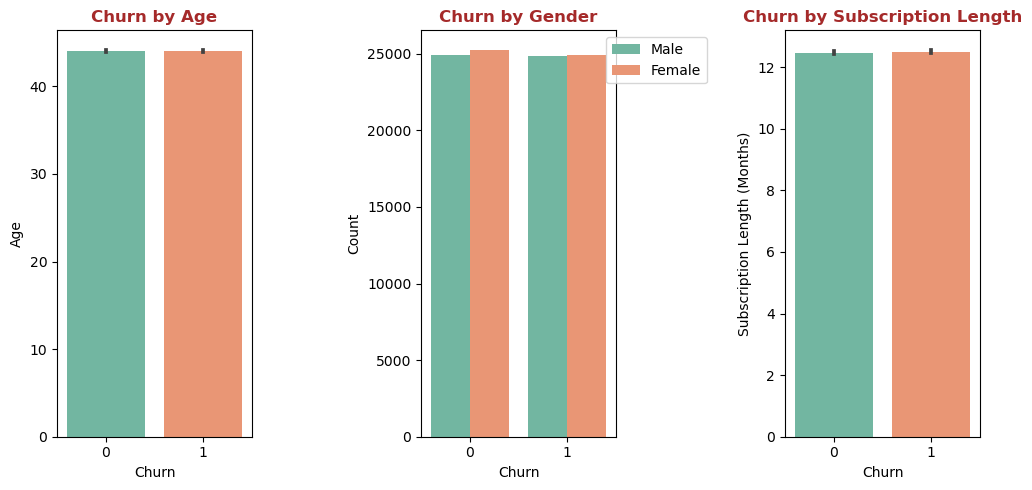

In [18]:
plt.figure(figsize=(10, 5))

# Plot 1: Churn by Age
plt.subplot(1, 3, 1)
sns.barplot(x='Churn', y='Age', data=data, palette='Set2')
plt.title('Churn by Age', color='brown', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Age')

# Plot 2: Churn by Gender
plt.subplot(1, 3, 2)
sns.countplot(x='Churn', hue='Gender', data=data, palette='Set2')
plt.title('Churn by Gender', color='brown', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# Plot 3: Churn by Subscription Length
plt.subplot(1, 3, 3)
sns.barplot(x='Churn', y='Subscription_Length_Months', data=data, palette='Set2')
plt.title('Churn by Subscription Length', color='brown', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')

plt.tight_layout()
plt.show()

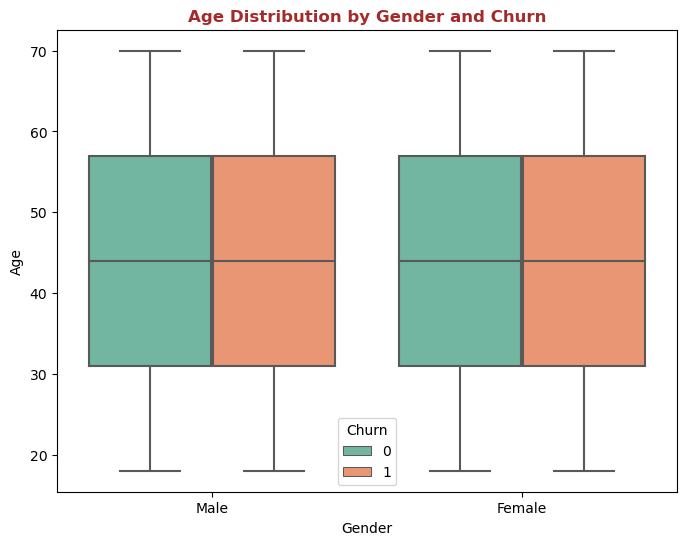

In [19]:
# Age Distribution by Gender and Churn

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Age', hue='Churn', palette='Set2')

# Add title and labels
plt.title('Age Distribution by Gender and Churn',color='brown', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

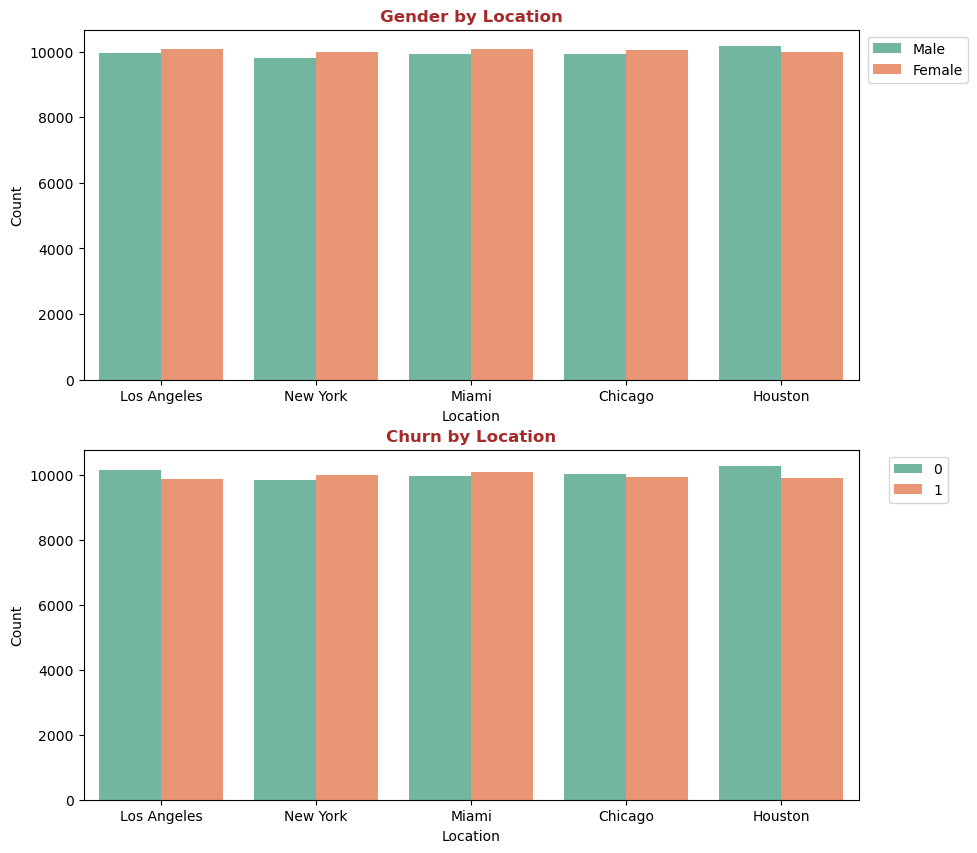

In [20]:
# Subplots for Location by Gender and Churn:

plt.figure(figsize=(10, 10))

# Plot 1: Gender by Location
plt.subplot(2, 1, 1)
sns.countplot(x='Location', hue='Gender', data=data, palette='Set2')
plt.title('Gender by Location', color='brown', fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Count')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Male', 'Female']
plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1))


# Plot 2: Churn by Location
plt.subplot(2, 1, 2)
sns.countplot(x='Location', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Location', color='brown', fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# Show the plot
plt.show()

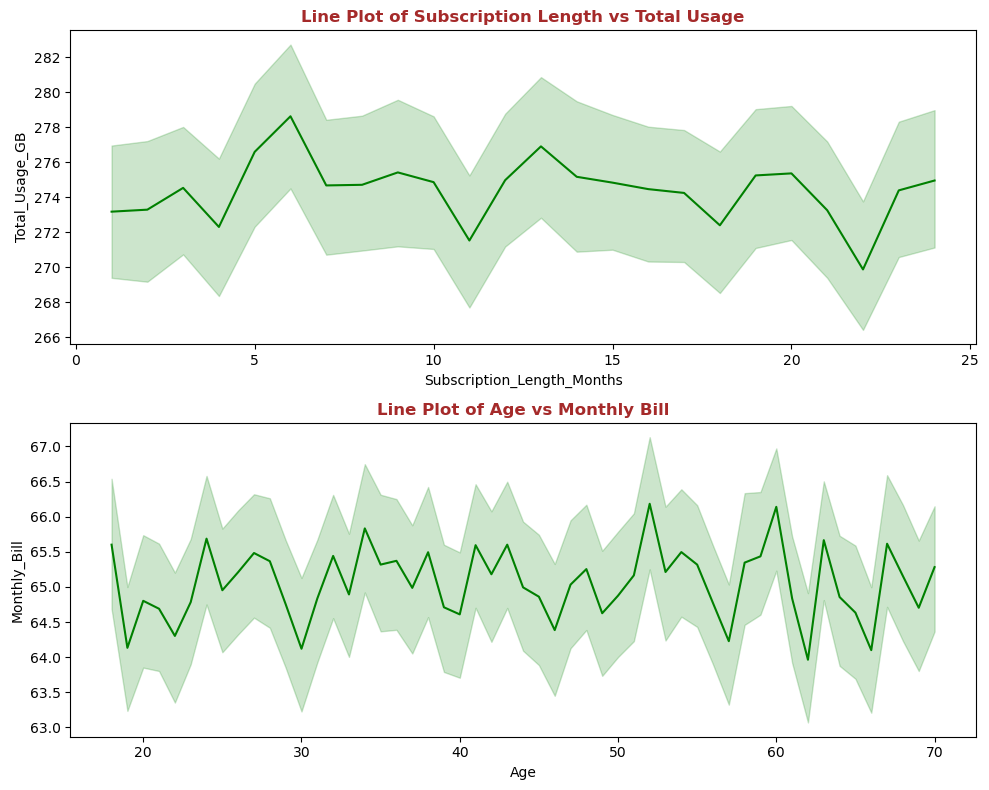

In [21]:
#Bivariate Plots:

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Line plot of Total Usage vs Subscription Length
sns.lineplot(x='Subscription_Length_Months', y='Total_Usage_GB', data=data, color='green', ax=ax1)
ax1.set_title('Line Plot of Subscription Length vs Total Usage',color='brown', fontweight='bold')

# Line plot of Age vs Monthly Bill
sns.lineplot(x='Age',y='Monthly_Bill', data=data, color='green', ax=ax2)
ax2.set_title('Line Plot of Age vs Monthly Bill',color='brown', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

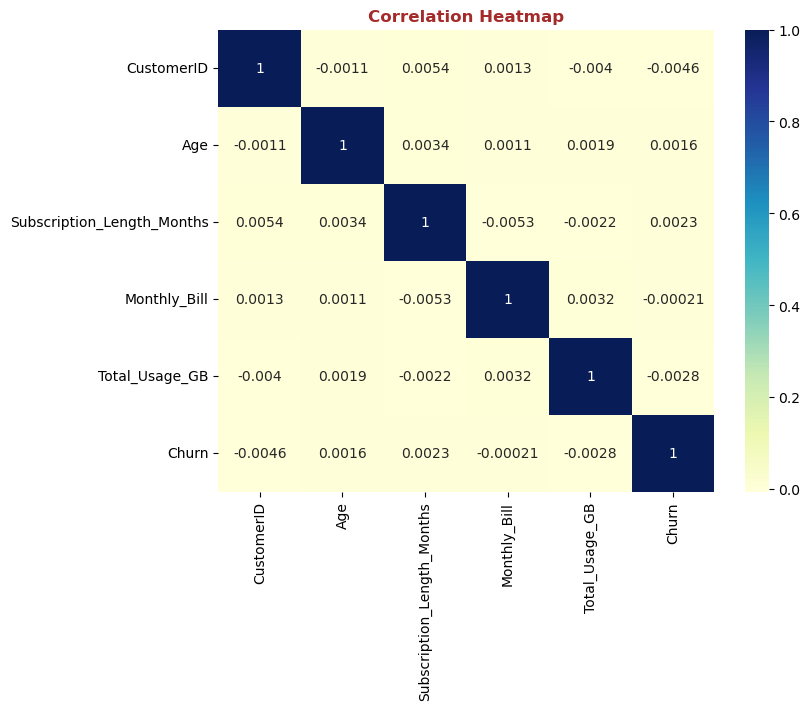

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

plt.title("Correlation Heatmap",color='brown', fontweight='bold')
plt.show()

###### No pair of variable is highly corrleated.

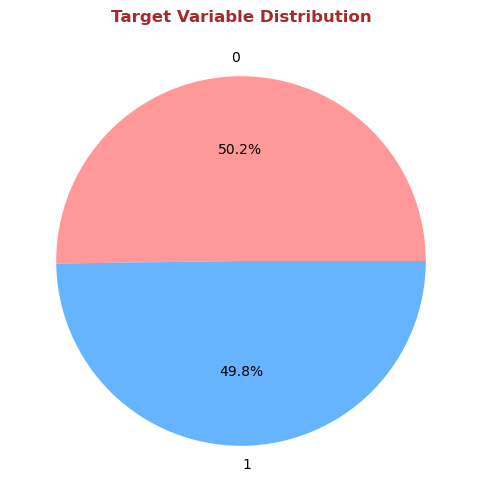

In [23]:
# Count the number of churned and non-churned customers
churn_counts = data['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',colors= ['#ff9999','#66b3ff'])

# Add title and labels
plt.title('Target Variable Distribution', color='brown', fontweight='bold')
plt.show()

###### The churn variables are almost evenly distributed, which means that there is no problem of class imbalance.

## <font color = blue>Data Preprocessing:

### <font color = blue>Data Cleaning:

###  Missing Value Handling:

In [24]:
# Check for missing values:

data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### Outlier Handling:

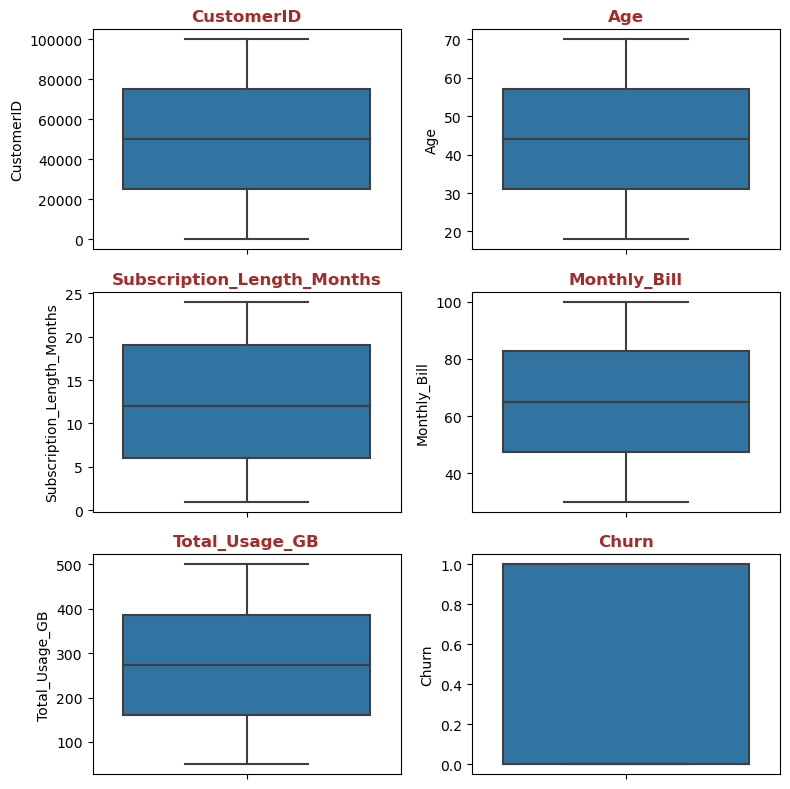

In [25]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols.columns)
num_rows = int(np.ceil(num_cols / 2))

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[column], ax=axs[i])
    axs[i].set_title(column,color='brown', fontweight='bold')

# Hide empty subplots if there are an odd number of plots
if num_cols % 2 != 0:
    axs[-1].axis('off')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

## <font color = blue>Feature Engineering:

In [26]:
#creating a copy
df = data.copy()

In [27]:
# The objective of this project is to develop a machine learning model to predict customer churn based on historical customer data
# Exclude 'Name' and 'CustomerID' columns from the dataset since they are not relevant for model building.

df_clean = df.drop(['CustomerID','Name'],axis=1)

In [28]:
# Identify categorical columns & numerical columns

df_clean.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [29]:
categorical_columns = ['Gender','Location']
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

### <font color = blue>Feature Encoding: 

###### One-hot encoding converts categorical variables into binary vectors. 

In [30]:
# Apply one-hot encoding
df_clean = pd.get_dummies(df_clean, columns=categorical_columns)

###  <font color = blue>Feature Scaling:

###### Min-Max scaling transforms majority of variables in binary , it transforms numerical features to a common range. 

In [31]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling 
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

In [32]:
df_clean.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0.865385,0.695652,0.619429,0.413333,0,0,1,0,0,1,0,0
1,0.846154,0.000000,0.268000,0.271111,0,1,0,0,0,0,0,1
2,0.115385,0.173913,0.792429,0.911111,0,1,0,0,0,1,0,0
3,0.346154,0.086957,0.970571,0.548889,1,1,0,0,0,0,1,0
4,0.538462,0.782609,0.402000,0.480000,0,1,0,0,0,0,1,0


### <font color = blue> Train and Evaluate the models by applying Classification Algorithms: 

In [33]:
# Selecting Target(y) column and Feature(x) columns

x = df_clean.drop("Churn", axis=1)  # Independent variable
y = df_clean['Churn']  # Dependent variable

In [34]:
# Hold Out Techiniques:

#Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

# This specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.

## <font color = blue>Model Building:

In [35]:
# Function to train and evaluate models

def train_and_evaluate_models(model,algorithm_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results
    print(f"Results for {algorithm_name}:")
    print("Confusion matrix: ", cm)
    print("Classification Report:")
    print(report)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

### 1.  Logistic Regression 

In [36]:
model = LogisticRegression()
train_and_evaluate_models(model,  "Logistic Regression" ,x_train, y_train, x_test, y_test)

Results for Logistic Regression:
Confusion matrix:  [[6320 3759]
 [6158 3763]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.50415
Precision: 0.5034032466958385
Recall: 0.50415
F1-score: 0.49641947884052395


###  2. Support Vector Machine (SVM)

In [37]:
model = SVC()
train_and_evaluate_models(model,"Support Vector Machine", x_train, y_train, x_test, y_test)

Results for Support Vector Machine:
Confusion matrix:  [[6374 3705]
 [6315 3606]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56     10079
           1       0.49      0.36      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Accuracy: 0.499
Precision: 0.4978130414379959
Recall: 0.499
F1-score: 0.4897746309143264


###  3. k-Nearest Neighbors (kNN)

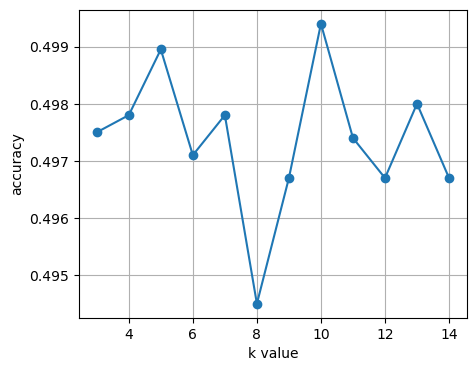

In [38]:
# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range 

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    knn.fit(x_train,y_train)    
    y_pred_knn = knn.predict(x_test)    
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [39]:
model = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
train_and_evaluate_models(model,"K-Nearest Neighbors", x_train, y_train, x_test, y_test)

Results for K-Nearest Neighbors:
Confusion matrix:  [[6326 3753]
 [6259 3662]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56     10079
           1       0.49      0.37      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Accuracy: 0.4994
Precision: 0.49829759688333763
Recall: 0.4994
F1-score: 0.4908940921657875


### 4. Decision Tree

In [40]:
model = DecisionTreeClassifier()
train_and_evaluate_models(model,"Decision Tree", x_train, y_train, x_test, y_test)

Results for Decision Tree:
Confusion matrix:  [[5042 5037]
 [4976 4945]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.49935
Precision: 0.49937410221509115
Recall: 0.49935
F1-score: 0.49935740603933354


### 5. Random Forest

In [41]:
model = RandomForestClassifier()
train_and_evaluate_models(model,"Random Forest", x_train, y_train, x_test, y_test)

Results for Random Forest:
Confusion matrix:  [[5201 4878]
 [5258 4663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

Accuracy: 0.4932
Precision: 0.49303769749946885
Recall: 0.4932
F1-score: 0.49294078695084553


### 6. Gradient Boosting

In [42]:
model = GradientBoostingClassifier()
train_and_evaluate_models(model,"Gradient Boosting", x_train, y_train, x_test, y_test)

Results for Gradient Boosting:
Confusion matrix:  [[5522 4557]
 [5457 4464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52     10079
           1       0.49      0.45      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.4993
Precision: 0.49893483238384806
Recall: 0.4993
F1-score: 0.49810473881915895


### 7.  Naive Bayes

In [43]:
model = GaussianNB()
train_and_evaluate_models(model,"Naive Bayes", x_train, y_train, x_test, y_test)

Results for Naive Bayes:
Confusion matrix:  [[6141 3938]
 [5969 3952]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.61      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.50465
Precision: 0.5040189307300318
Recall: 0.50465
F1-score: 0.49907760596710576


### 8.  Extreme Gradient Boosting (XGB)

In [44]:
model = XGBClassifier()
train_and_evaluate_models(model,"Extreme Gradient Boosting", x_train, y_train, x_test, y_test)

Results for Extreme Gradient Boosting:
Confusion matrix:  [[5219 4860]
 [5093 4828]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.50235
Precision: 0.502259585342756
Recall: 0.50235
F1-score: 0.502236613143385


###  9.  Adaptive Boosting (Ada Boost)

In [45]:
model =  AdaBoostClassifier()
train_and_evaluate_models(model,"Adaptive Boosting", x_train, y_train, x_test, y_test)

Results for Adaptive Boosting:
Confusion matrix:  [[5635 4444]
 [5485 4436]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53     10079
           1       0.50      0.45      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.50355
Precision: 0.5031754973993778
Recall: 0.50355
F1-score: 0.5019952910332116


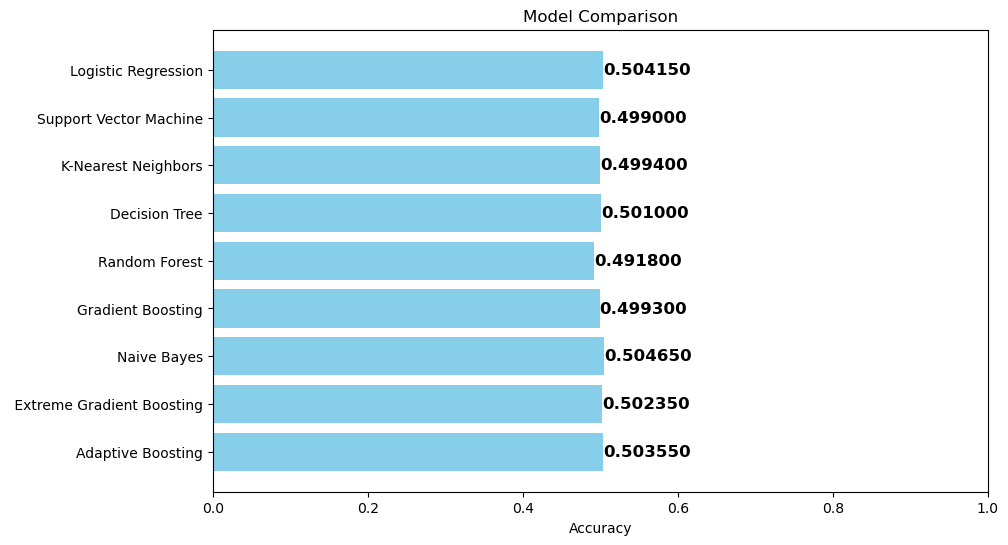

The best model is Naive Bayes with an accuracy of 0.50465


In [57]:
# Define a list of models and their corresponding names
models = [
    (LogisticRegression(), "Logistic Regression"),
    (SVC(), "Support Vector Machine"),
   (KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2) , "K-Nearest Neighbors"),
    (DecisionTreeClassifier() , "Decision Tree"),
    (RandomForestClassifier() , "Random Forest"),
    (GradientBoostingClassifier() , "Gradient Boosting"),
    (GaussianNB() , "Naive Bayes"),
    (XGBClassifier() , " Extreme Gradient Boosting"),
    (AdaBoostClassifier() ,"Adaptive Boosting" )
]

# Lists to store model names and results
model_names = []
results = []

best_model = None
best_accuracy = 0

# Iterate over the models
for model, algorithm_name in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this model has higher accuracy
    if accuracy > best_accuracy:
        best_model = algorithm_name
        best_accuracy = accuracy
        
    # Append model name and result for plotting
    model_names.append(algorithm_name)
    results.append(accuracy)

# Plot the model comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1.0)
plt.gca().invert_yaxis() 

for i, v in enumerate(results):
    plt.text(v, i, f'{v:.6f}', va='center', fontsize=12, color='black', fontweight='bold')

plt.show()

# Print the best model
print(f"The best model is {best_model} with an accuracy of {best_accuracy}")

######  The summary of the model performance indicates that the following machine learning models, when applied to the dataset, achieved similar accuracy levels of approximately 50%. Among these models, Naive Bayes slightly outperformed the others in terms of accuracy

## <font color = blue>Cross-Validation and Hyperparameter Tuning:

In [59]:
# Define the hyperparameters and their ranges to search

# Define the parameter grid for GaussianNB
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],  # Example priors, you can adjust these
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example var_smoothing values, you can adjust these
}

# Initialize the Naive Bayes Classifier
model = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Train and evaluate the best model
train_and_evaluate_models(best_model, "Tuned Naive Bayes", x_train, y_train, x_test, y_test)

Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Results for Tuned Naive Bayes:
Confusion matrix:  [[6141 3938]
 [5969 3952]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.61      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.50465
Precision: 0.5040189307300318
Recall: 0.50465
F1-score: 0.49907760596710576


In [68]:
# Initialize lists to store model names and results
model_names = []
results = []
algorithm_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Define a list of models and their corresponding names
models = [
    (LogisticRegression(), "Logistic Regression"),
    (SVC(), "Support Vector Machine"),
   (KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2) , "K-Nearest Neighbors"),
    (DecisionTreeClassifier() , "Decision Tree"),
    (RandomForestClassifier() , "Random Forest"),
    (GradientBoostingClassifier() , "Gradient Boosting"),
    (GaussianNB() , "Naive Bayes"),
    (XGBClassifier() , " Extreme Gradient Boosting"),
    (AdaBoostClassifier() ,"Adaptive Boosting" )
]

best_model = None
best_accuracy = 0

# Iterate over the models
for model, algorithm_name in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this model has higher accuracy
    if accuracy > best_accuracy:
        best_model = algorithm_name
        best_accuracy = accuracy
        
    # Append results for each metric to the respective lists
    algorithm_names.append(algorithm_name)
    accuracies.append(accuracy)
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Print the DataFrame
print(results_df)

                    Algorithm  Accuracy  Precision   Recall  F1-score
0         Logistic Regression   0.50415   0.503403  0.50415  0.496419
1      Support Vector Machine   0.49900   0.497813  0.49900  0.489775
2         K-Nearest Neighbors   0.49940   0.498298  0.49940  0.490894
3               Decision Tree   0.49975   0.499771  0.49975  0.499757
4               Random Forest   0.49390   0.493758  0.49390  0.493688
5           Gradient Boosting   0.49930   0.498935  0.49930  0.498105
6                 Naive Bayes   0.50465   0.504019  0.50465  0.499078
7   Extreme Gradient Boosting   0.50235   0.502260  0.50235  0.502237
8           Adaptive Boosting   0.50355   0.503175  0.50355  0.501995


###### It seems that the hyperparameter tuning didn't lead to a significant improvement in the model's performance. This can happen, especially with models like Gaussian Naive Bayes that have fewer hyperparameters to tune. While all models exhibited a similar level of accuracy,I decided to build model using  Logistic Regression demonstrated a slightly near accuray to Naive Bayes.
###### The accuracy of Naive Bayes is 50.46%, while the accuracy of Logistic Regression is 50.41%.

In [73]:
best_model = LogisticRegression()

# Define the hyperparameters and their ranges to search

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'] 
}

# Initialize the Logistic Regression Classifier
model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Train and evaluate the best model
train_and_evaluate_models(best_model, "Tuned Logistic Regression", x_train, y_train, x_test, y_test)

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Results for Tuned Logistic Regression:
Confusion matrix:  [[6538 3541]
 [6375 3546]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.65      0.57     10079
           1       0.50      0.36      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Accuracy: 0.5042
Precision: 0.5033556507235455
Recall: 0.5042
F1-score: 0.49344926988388454


###### It looks like the hyperparameter tuning for Logistic Regression resulted in a slight improvement in accuracy from 50.41% to 50.42%. While the increase is not substantial, it's still a positive sign that the tuning process had some effect on the model's performance.  

## <font color = blue> Conclusion:

##### The best algorithm to fit the model is Logistic Regression Algorithm. The algorithm classifies the side effects of drug based on Race, Age, Condition, EaseofUse, Satisfaction, Sex.

## <font color = blue> Summary:

###### <font color = brown> Customer Churn Prediction :
    
###### Introduction: Churn prediction is a critical task for businesses spanning diverse industries, as it enables the identification of customers who may discontinue using a service or product. In this project, I endeavored to construct a predictive model aimed at detecting potential churners within a customer base. Employing machine learning methodologies, I analyzed historical customer data to forecast future customer behavior.
###### Data Preprocessing:Data preprocessing is a critical step in any machine learning project. I performed the following preprocessing steps:
###### Handling missing values: Checked for missing data and applied appropriate techniques .
###### Exploratory Data Analysis (EDA): Explored the dataset to gain insights into feature distributions, correlations, and potential outliers.
###### Feature Engineering: Created new features, if necessary, and transformed existing ones to improve model performance.
###### Encoding Categorical Data: Encoded categorical variables using technique one-hot encoding.
###### Scaling Numeric Features: Scaled numeric featuresusing techniques Min-Max scaling  to ensure that they had similar scales and were not biased during model training.
###### Model Selection: I conducted experiments with various machine learning algorithms, encompassing logistic regression, decision trees, random forests,GradientBoosting,Extreme Gradient Boosting,Naive Bayes,Adaptive Boosting etc... After rigorous testing and evaluation, I opted for a Logistic Regression Algorithm model owing to its interpretability and satisfactory performance.
###### Model Training:I conducted model training using a portion of the dataset. I employed techniques such as cross-validation to fine-tune hyperparameters and mitigate overfitting. The training data was partitioned into training and validation sets to evaluate the model's performance and implement any necessary adjustments.
###### Model Evaluation:I evaluated the model's performance using metrics such as accuracy, precision, recall, and F1-score. These metrics helped me assess how well the model predicted customer churn. Additionally, I generated a confusion matrix to visualize the model's predictions. I will continue to use these evaluation methods to assess the model's performance and make any necessary adjustments.
###### Deployment: To make the  churn prediction model accessible, I deployed it using Flask, a user-friendly web application framework. Users can interact with the deployed model by inputting customer data and receiving predictions on whether a customer is likely to churn.
###### Conclusion: In conclusion, the churn prediction project aimed to assist businesses in reducing customer churn rates by identifying potential churners early. The Logistic Regression Algorithm model achieved a test accuracy of approximately 50.4%, which was slightly better than random guessing. While this accuracy might seem modest, it provides a foundation for further improvements. When deployed , this model enables me to make real-time predictions about customer churn, allowing me to take proactive measures to retain customers.Moving forward, I plan to collect more diverse data, experiment with advanced machine learning techniques, and incorporate customer feedback to refine the model further. 
###### In summary, this churn prediction project provides a valuable tool for businesses to identify potential churners and take proactive actions to retain customers, ultimately contributing to improved customer retention and business sustainability.

In [74]:
# Fit Model:
best_model.fit(x_train, y_train)

# Save the trained Logistic Regression model using pickle:

import pickle

# Save the model to a file
with open('trained_logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)